In [13]:
import pandas as pd
import os
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

file_name = 'coffee_ratings.csv'
document_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'  

if os.path.exists(file_name):
    pass
else:
    response = requests.get(document_url)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.content)
    else:
        print(f'Failed to download the document. Status code: {response.status_code}')

coffee = pd.read_table('coffee_ratings.csv', sep=",", encoding="utf8", engine='python')

df_coffee = pd.read_csv('coffee_ratings.csv')
print(df_coffee.sample(n = 5)) 

     total_cup_points  species                         owner  \
405             83.33  Arabica               eileen koyanagi   
623             82.67  Arabica                    adam kline   
526             83.00  Arabica  doi tung development project   
515             83.00  Arabica               carcafe ltda ci   
295             83.75  Arabica              kennedy macharia   

          country_of_origin                     farm_name lot_number  \
405  United States (Hawaii)                           NaN        NaN   
623             El Salvador                           NaN        NaN   
526                Thailand  doi tung development project        NaN   
515                Colombia                           NaN        NaN   
295                   Kenya                           NaN    sc 9693   

             mill     ico_number                           company   altitude  \
405           NaN       KP012314  kona pacific farmers cooperative        NaN   
623           NaN  0

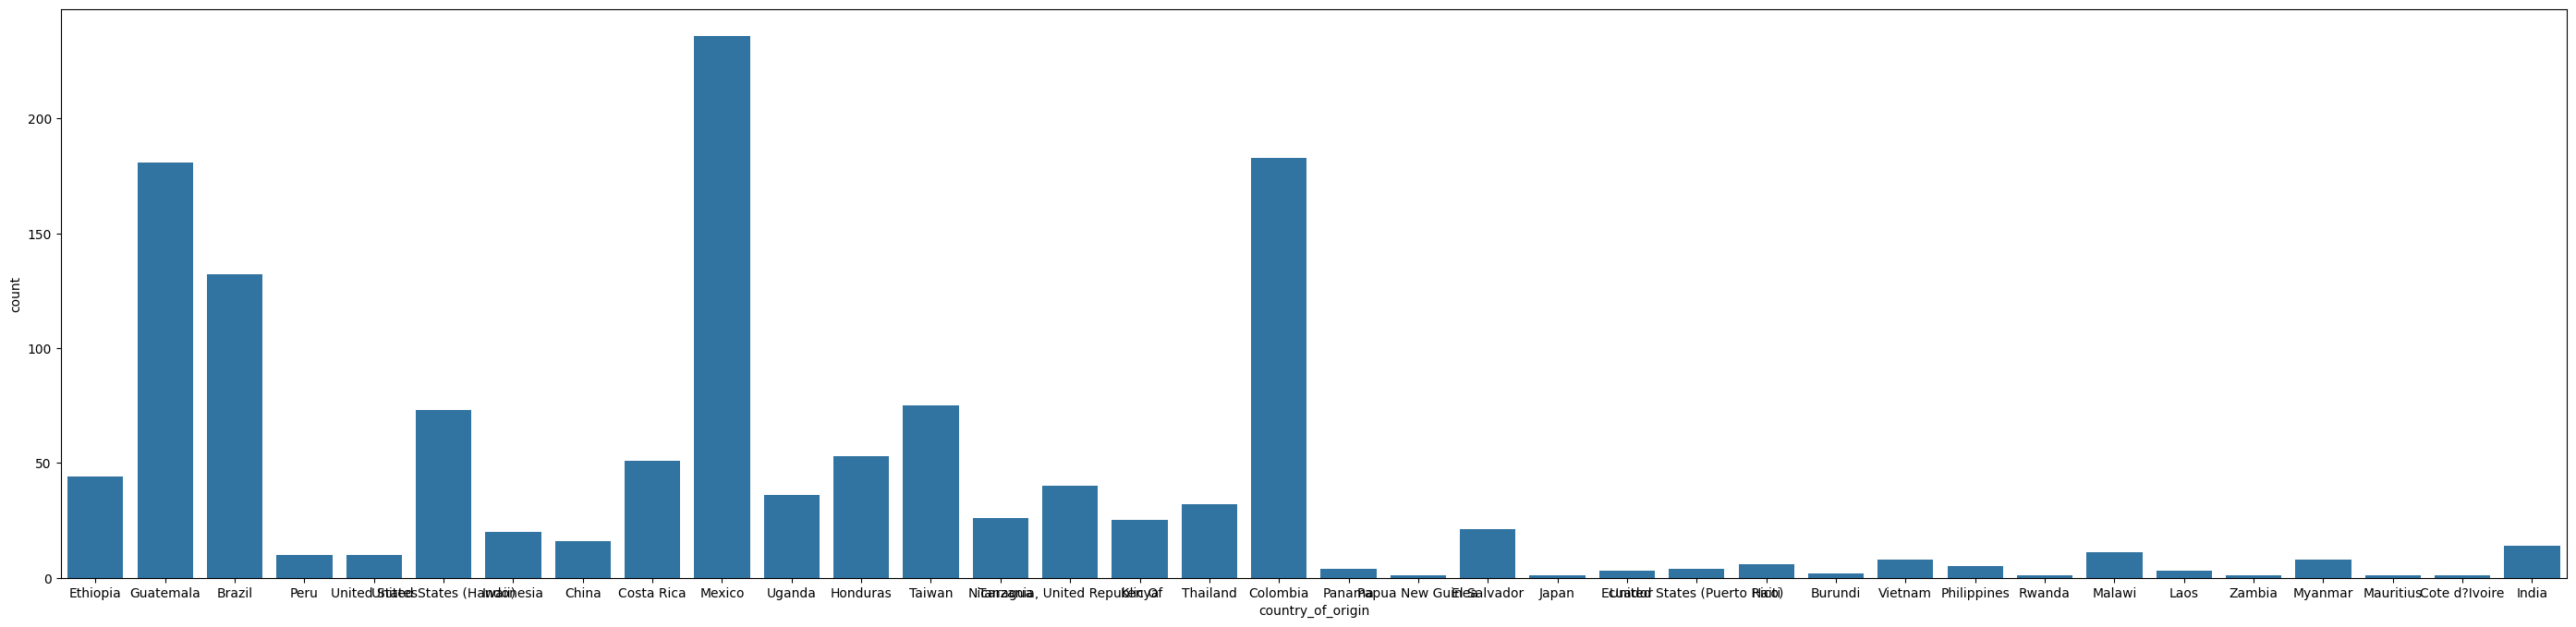

In [9]:
# 1. Які країни є великими експортерами кави?
plt.figure(figsize = (35,8)) 

sns.countplot(x = df_coffee.country_of_origin , data = df_coffee); 
'''Найбільшими експортерами кави є Мексика, Колумбія, Гватемала та Бразилія'''

<Axes: >

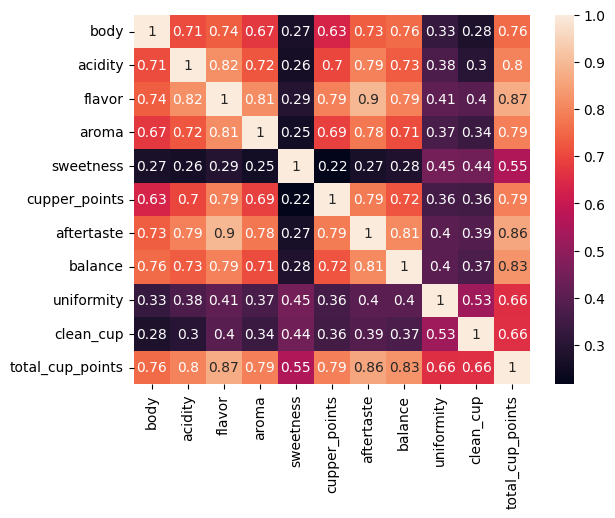

In [12]:
# 2. Які кореляції між різними показниками оцінки кави?
coffee_matrix=['body','acidity', 'flavor', 'aroma','sweetness', 
'cupper_points', 'aftertaste', 'balance', 'uniformity', 'clean_cup','total_cup_points']
corr_matrix = df_coffee.loc[:,coffee_matrix].corr()
sns.heatmap(corr_matrix, annot=True)

'''найбільше корилюють flavor і aftertaste, найменше - cupper_points і sweetness'''

<Axes: xlabel='None-color', ylabel='species'>

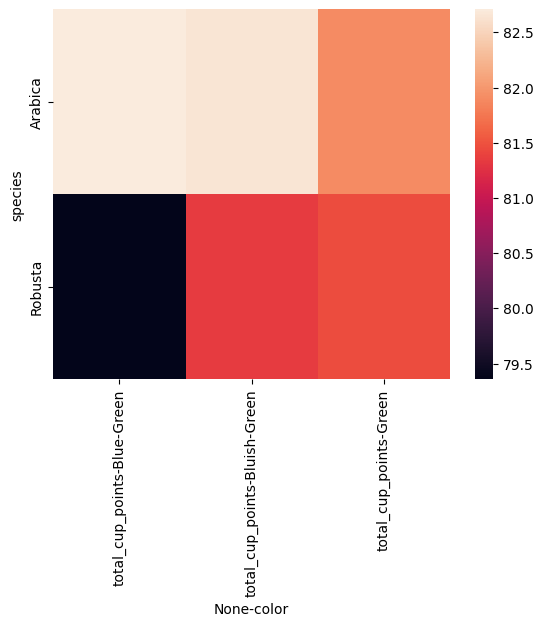

In [16]:
# 3. Який (якщо є) вплив кольору зерен на загальний сорт кави?
pivot = df_coffee.pivot_table(index=["species"],columns=["color"],values=['total_cup_points'],aggfunc=np.average)
sns.heatmap(pivot)
'''Вплив є, найбільше корилює колір зерен у випадку з арабікою.'''

C:\Users\Natalka\AppData\Local\Temp\ipykernel_7772\3040201181.py:2: FutureWarning: The provided callable <function mean at 0x000002BCCE33FC40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table_of_coffee = pd.pivot_table(df_coffee,index=['country_of_origin'],values=['total_cup_points'], aggfunc=np.mean)


'найкраща оцінка якості кави у Папуа Нова Гвінея та Ефіопії, найменша у Гаїті'

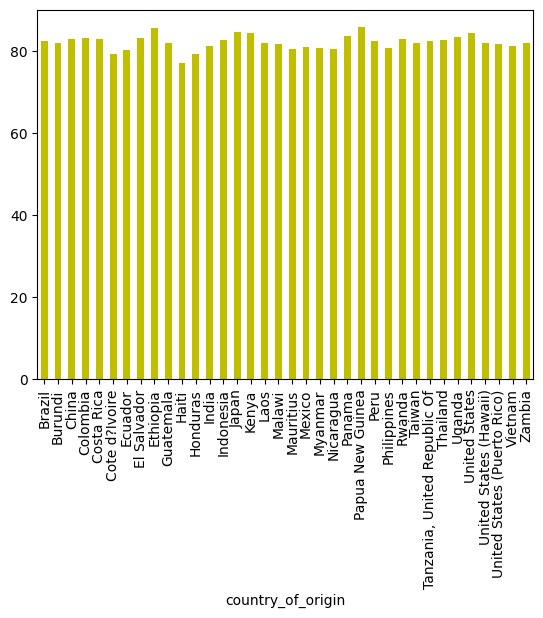

In [18]:
# 4. Чи впливає країна походження на якість кави?
table_of_coffee = pd.pivot_table(df_coffee,index=['country_of_origin'],values=['total_cup_points'], aggfunc=np.mean)
sort_table = table_of_coffee.reindex(table_of_coffee.sort_values(by='total_cup_points', ascending=False).index)
result = table_of_coffee.plot(kind='bar',color='y',legend=False)
'''найкраща оцінка якості кави у Папуа Нова Гвінея та Ефіопії, найменша у Гаїті'''

C:\Users\Natalka\AppData\Local\Temp\ipykernel_7772\3031016918.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NaN' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_coffee.loc[df_coffee['altitude_mean_meters'] == '190164.0 ', 'altitude_mean_meters'] = 'NaN'


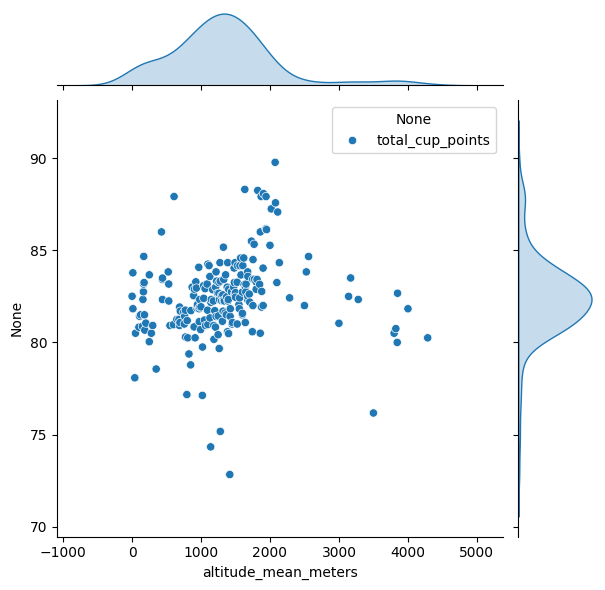

In [21]:
# 5. Чи суттєво впливає висота на якість кави?
df_coffee = df_coffee[df_coffee.altitude_mean_meters!=110000.0]
df_coffee = df_coffee[df_coffee.altitude_mean_meters!=11000.0]
df_coffee = df_coffee[df_coffee.altitude_mean_meters!=190164.0]
df_coffee.loc[df_coffee['altitude_mean_meters'] == '190164.0 ', 'altitude_mean_meters'] = 'NaN'
table_meters= pd.pivot_table(df_coffee,index=['altitude_mean_meters'],values=['total_cup_points'], aggfunc=np.average)
sns.jointplot(data=table_meters)

'''найвищі оцінки отримувала кава вирощена на висоті від 500 до 2000 метрів'''